<a href="https://colab.research.google.com/github/wisrovi/Hospital-smart-bracelet/blob/master/RedNeuronalHallarCoordenada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sqrt
def CalcularPuntos(punto_clave1, punto_clave2):  
  x_p1 = punto_clave1[0][0]
  y_p1 = punto_clave1[0][1]
  l_p1 = punto_clave1[1]

  x_p2 = punto_clave2[0][0]
  y_p2 = punto_clave2[0][1]
  l_p2 = punto_clave2[1]


  ##################################################################################################################
  constanteX_ecuacion1 = -(y_p1/2 - y_p2/2)
  constanteY_ecuacion1 = x_p1/2 - x_p2/2
  raizDenominador = sqrt(  pow((x_p1-x_p2),2)  +  pow((y_p1-y_p2),2) )
  denominador1 = -l_p1 + l_p2 + raizDenominador
  denominador2 = l_p1 - l_p2 + raizDenominador
  denominador3 = l_p1 + l_p2 - raizDenominador
  denominador4 = l_p1 + l_p2 + raizDenominador
  denominador = denominador1 * denominador2 * denominador3 * denominador4
  denominador = abs(denominador)
  denominador = sqrt(denominador)
  constanteNumerica_ecuacion1 = (1/4) * denominador  + ((x_p1*y_p2)/2) - ((x_p2*y_p1)/2) 
  # print("Ecuacion 1 (Manual)")
  # La ecuacion 1 esta definida de la siguiente manera
  # ecuacion1 = x*(constanteX_ecuacion1) + (y)*(constanteY_ecuacion1) - constanteNumerica_ecuacion1




  ##################################################################################################################
  # print("Ecuacion 2 (Manual)")
  constanteX_ecuacion2 =  2*x_p1 -2*x_p2
  constanteY_ecuacion2 = 2*y_p1 -2*y_p2
  constanteNumerica_ecuacion2 = pow(l_p1, 2) - pow(l_p2, 2) - pow(x_p1, 2) + pow(x_p2, 2) - pow(y_p1, 2) + pow(y_p2, 2) 

  # La ecuacion 2 esta definida de la siguiente manera
  # ecuacion2 = x*(constanteX_ecuacion2) + y*(constanteY_ecuacion2)  + constanteNumerica_ecuacion2



  ##################################################################################################################
  rtaY = -(constanteX_ecuacion1*constanteNumerica_ecuacion2 + constanteX_ecuacion2*constanteNumerica_ecuacion1) / (constanteX_ecuacion1*constanteY_ecuacion2 - constanteX_ecuacion2*constanteY_ecuacion1)
  rtaY = round(rtaY, 1)

  rtaX = -(constanteNumerica_ecuacion1*constanteY_ecuacion2 + constanteNumerica_ecuacion2*constanteY_ecuacion1)/(constanteX_ecuacion2*constanteY_ecuacion1-constanteX_ecuacion1*constanteY_ecuacion2) 
  rtaX = round(rtaX, 1)
  return rtaX, rtaY

In [2]:
class Persona:
    puntoCercano_1 = None
    distanciaPunto_1 = 0
    puntoCercano_2 = None
    distanciaPunto_2 = 0

    def __init__(self, punto1, dist1, punto2, dist2):
        self.puntoCercano_1 = punto1
        self.distanciaPunto_1 = dist1
        self.puntoCercano_2 = punto2
        self.distanciaPunto_2 = dist2

    def getPunto1(self):
        return self.puntoCercano_1, self.distanciaPunto_1

    def getPunto2(self):
        return self.puntoCercano_2, self.distanciaPunto_2
        
class BalizaInstalada:
    nombre = None
    ubicacion = None
    distancia = None

    def __init__(self, ubi, nombre, dist):
        self.ubicacion = ubi
        self.nombre = nombre
        self.distancia = dist


class Ubicacion:
    x = int()
    y = int()

    def __init__(self, x, y):
        self.x = x
        self.y = y


def HallarMejorSolucion(Distancia: dict, puntos: dict, constantePresicion=1.5):
    """
    :param Distancia: diccionario de distancias de las balizas, este contiene la longitud de los vectores de cada baliza hasta el punto a hallar
    :param puntos: diccionario de ubicaciones e cada baliza
    :param constantePresicion: valor absoluto de variacion de error, esto es para no descartar todas las respuestas
    :return: Entrega la ubicación lo mas precisa posible de acuerdo a los puntos entregados para analizar
    """
    valores = list()
    for i in Distancia:
        valores.append(Distancia[i])
    valores = sorted(valores)

    itemEvaluar = list()
    for i in valores:
        if len(itemEvaluar) == 3:
            break
        else:
            if i > 0:
                itemEvaluar.append(i)
    valores = itemEvaluar

    itemsUsar = []
    for i in Distancia:
        if len(itemsUsar) == 3:
            break

        if Distancia[i] >= 0:
            if Distancia[i] == valores[0]:
                itemsUsar.append(i)
            elif Distancia[i] == valores[1]:
                itemsUsar.append(i)

            elif Distancia[i] == valores[2]:
                itemsUsar.append(i)
    if len(itemsUsar) == 3:

        # print("Balizas usar:", itemsUsar)

        respuestas = list()

        person_option_one = Persona(
            puntos[str(itemsUsar[0])],
            Distancia[itemsUsar[0]],
            puntos[str(itemsUsar[1])],
            Distancia[itemsUsar[1]]
        )
        x_one, y_one = CalcularPuntos(person_option_one.getPunto1(), person_option_one.getPunto2())
        respuestas.append((x_one, y_one))

        person_option_two = Persona(
            puntos[str(itemsUsar[1])],
            Distancia[itemsUsar[1]],
            puntos[str(itemsUsar[0])],
            Distancia[itemsUsar[0]]
        )
        x_two, y_two = CalcularPuntos(person_option_two.getPunto1(), person_option_two.getPunto2())
        respuestas.append((x_two, y_two))

        person_option_three = Persona(
            puntos[str(itemsUsar[0])],
            Distancia[itemsUsar[0]],
            puntos[str(itemsUsar[2])],
            Distancia[itemsUsar[2]]
        )
        x_three, y_three = CalcularPuntos(person_option_three.getPunto1(), person_option_three.getPunto2())
        respuestas.append((x_three, y_three))

        person_option_for = Persona(
            puntos[str(itemsUsar[2])],
            Distancia[itemsUsar[2]],
            puntos[str(itemsUsar[0])],
            Distancia[itemsUsar[0]]
        )
        x_for, y_for = CalcularPuntos(person_option_for.getPunto1(), person_option_for.getPunto2())
        respuestas.append((x_for, y_for))

        filtro = []
        for i in respuestas:
            if i[0] is not None:
                filtro.append(i)
        respuestas = filtro

        def clave_ordenacion(tupla):
            return tupla[0], -tupla[1]

        respuestas = sorted(respuestas, key=clave_ordenacion)

        for i in respuestas:
            # print(i)
            pass

        # print("***************")
        CartesianoFinal = None
        for i in range(len(respuestas) - 1):
            x1, y1 = respuestas[i]
            x2, y2 = respuestas[i + 1]
            evaluarX = x1 + constantePresicion
            evaluarY = y1 + constantePresicion
            if evaluarX >= x2 and evaluarY >= y2:
                promedioX = round(x1 + round((x2 - x1) / 2, 2), 2)
                promedioY = round(y1 + round((y2 - y1) / 2, 2), 2)
                CartesianoFinal = (promedioX, promedioY)
                break
        if CartesianoFinal is None:
            for i in respuestas:
                print(i)
            print("Con ese valor de constante no es posible hallar una ubicación")
        else:
            pass
            # print("El valor estimado de ubicación (x,y) es", CartesianoFinal, "+-", constantePresicion)
        return CartesianoFinal, itemsUsar

    else:
        print("No hay suficientes puntos para hallar la posición")


def CalcularPosicion(listadoBalizas: list, precision=10):
    """
    :param listadoBalizas: listado de las balizas instaladas, estas se reorganizaran para usar las mas cercanas al punto a buscar
    :param precision: Las ecuaciones dan un valor de presición en la busqueda de (x,Y) y este valor puede ser editado para obtener una mejor respuesta
    :return: Entrega la ubicación lo mas precisa posible de acuerdo a los puntos entregados para analizar
    """
    Balizas = dict()
    Distancias = dict()
    for i in range(len(listadoBalizas)):
        baliza = listadoBalizas[i]
        Balizas[str(i)] = (baliza.ubicacion.x, baliza.ubicacion.y)
        Distancias[i] = baliza.distancia
    return HallarMejorSolucion(Distancias, Balizas, precision)

In [3]:
def CalcularPosicion(listadoBalizas: list, precision=10):
    """
    :param listadoBalizas: listado de las balizas instaladas, estas se reorganizaran para usar las mas cercanas al punto a buscar
    :param precision: Las ecuaciones dan un valor de presición en la busqueda de (x,Y) y este valor puede ser editado para obtener una mejor respuesta
    :return: Entrega la ubicación lo mas precisa posible de acuerdo a los puntos entregados para analizar
    """
    Balizas = dict()
    Distancias = dict()
    for i in range(len(listadoBalizas)):
        baliza = listadoBalizas[i]
        Balizas[str(i)] = (baliza.ubicacion.x, baliza.ubicacion.y)
        Distancias[i] = baliza.distancia
    return HallarMejorSolucion(Distancias, Balizas, precision)

EXAMPLE

In [4]:
puntoA = (2, 12)
distancia_al_puntoA = 0.4

puntoB = (10, 10)
distancia_al_puntoB = 1.12

puntoC = (2, 2)
distancia_al_puntoC = 3.55

listadoBalizas = list()
listadoBalizas.append(BalizaInstalada(nombre="",ubi=Ubicacion(x=puntoA[0], y=puntoA[1]), dist=distancia_al_puntoA))
listadoBalizas.append(BalizaInstalada(nombre="",ubi=Ubicacion(x=puntoB[0], y=puntoB[1]), dist=distancia_al_puntoB))
listadoBalizas.append(BalizaInstalada(nombre="",ubi=Ubicacion(x=puntoC[0], y=puntoC[1]), dist=distancia_al_puntoC))



CartesianoFinal, idsBalizasUsadas = CalcularPosicion(listadoBalizas)
print(CartesianoFinal, idsBalizasUsadas )

(1.3, 7.35) [0, 1, 2]


GENERAR DATOS PARA HACER VARIAS PRUEBAS

In [1]:
def CalcularDistanciaDosPuntos(x1,x2,y1,y2):
  rta = sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
  rta = abs(rta)
  rta = round(rta, 2)
  return rta

import random
def numeroRandom(max=100):
  return random.randrange(max)

In [2]:
class puntoCartesiano():
  def __init__(self, x, y):
    self.x = x
    self.y = y

class PuntoVector():
  def __init__(self, punto, distanciaAlPunto):
    self.coordenadas = punto
    self.vector = distanciaAlPunto

class DatosTriliteracion():
  def __init__(self, dato1, dato2, dato3, respuesta):
    self.dato1 = dato1
    self.dato2 = dato2
    self.dato3 = dato3
    self.respuesta = respuesta

VAMOS A GENERAR DATOS EMULADOS

In [3]:
listadoDatosPuntosCartesiano = list()

from time import time
start_time = time()
for i in range(500000):
  punto1 =   puntoCartesiano(x=numeroRandom(), y=numeroRandom()) 
  punto2 =   puntoCartesiano(x=numeroRandom(), y=numeroRandom()) 
  punto3 =   puntoCartesiano(x=numeroRandom(), y=numeroRandom()) 
  puntoHallar = puntoCartesiano(x=numeroRandom(), y=numeroRandom()) 

  distancia_al_punto1 = CalcularDistanciaDosPuntos(  punto1.x, puntoHallar.x, punto1.y, puntoHallar.y   )
  distancia_al_punto2 = CalcularDistanciaDosPuntos(  punto2.x, puntoHallar.x, punto2.y, puntoHallar.y   )
  distancia_al_punto3 = CalcularDistanciaDosPuntos(  punto3.x, puntoHallar.x, punto3.y, puntoHallar.y   )

  datosPuntoCartesiano1 = PuntoVector(punto=punto1, distanciaAlPunto=distancia_al_punto1 )
  datosPuntoCartesiano2 = PuntoVector(punto=punto2, distanciaAlPunto=distancia_al_punto2 )
  datosPuntoCartesiano3 = PuntoVector(punto=punto3, distanciaAlPunto=distancia_al_punto3 )

  datosFinales = DatosTriliteracion(dato1=datosPuntoCartesiano1, dato2=datosPuntoCartesiano2, dato3=datosPuntoCartesiano3, respuesta=puntoHallar)
  listadoDatosPuntosCartesiano.append(datosFinales)

elapsed_time = time() - start_time
print("Elapsed time1: %0.10f seconds." % elapsed_time)

NameError: ignored

In [8]:
print(len(listadoDatosPuntosCartesiano))

for dato in listadoDatosPuntosCartesiano:
  # print("X=",dato.dato1.coordenadas.x, "Y=", dato.dato1.coordenadas.y, "D=", dato.dato1.vector)
  # print("X=",dato.dato2.coordenadas.x, "Y=", dato.dato2.coordenadas.y, "D=", dato.dato2.vector)
  # print("X=",dato.dato3.coordenadas.x, "Y=", dato.dato3.coordenadas.y, "D=", dato.dato3.vector)
  # print("X=",dato.respuesta.x, "Y=", dato.respuesta.y)
  # print()
  pass

1000000


HACEMOS UNA VALIDACION USANDO EL ALGORITMO ANTERIOR PARA COMPROBAR RESULTADOS
---



In [9]:
from time import time

fallidos = 0
listadoComprobado = list()
start_time = time()
for dato in listadoDatosPuntosCartesiano:
  listadoBalizas = list()
  listadoBalizas.append(BalizaInstalada(nombre="",ubi=Ubicacion(x=dato.dato1.coordenadas.x, y=dato.dato1.coordenadas.y), dist=dato.dato1.vector))
  listadoBalizas.append(BalizaInstalada(nombre="",ubi=Ubicacion(x=dato.dato2.coordenadas.x, y=dato.dato2.coordenadas.y), dist=dato.dato2.vector))
  listadoBalizas.append(BalizaInstalada(nombre="",ubi=Ubicacion(x=dato.dato3.coordenadas.x, y=dato.dato3.coordenadas.y), dist=dato.dato3.vector))
  
  try:
    CartesianoFinal, idsBalizasUsadas = CalcularPosicion(listadoBalizas)
    respuestaCorrecta = (dato.respuesta.x, dato.respuesta.y)
    #print(CartesianoFinal, respuestaCorrecta, end=" -> " )

    superiorX = respuestaCorrecta[0] + respuestaCorrecta[0]*0.3
    inferiorX = respuestaCorrecta[0] - respuestaCorrecta[0]*0.3

    superiorY = respuestaCorrecta[1] + respuestaCorrecta[1]*0.3
    inferiorY = respuestaCorrecta[1] - respuestaCorrecta[1]*0.3

    if  inferiorX <= CartesianoFinal[0] <= superiorX and inferiorY <= CartesianoFinal[1] <= superiorY:
      #print("X = ok", end=",")
      #print("Y = ok")
      listadoComprobado.append(dato)
    else:
      #print("X=", CartesianoFinal[0], ", Y=", CartesianoFinal[1])
      fallidos = fallidos + 1
  except:
    pass

print("Fallidos=", fallidos)
print("Correctos=", len(listadoComprobado))
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

Fallidos= 116914
Correctos= 882569
Elapsed time: 46.8251287937 seconds.


CONVERTIMOS LOS DATOS EMULADOS Y COMPROBADOS EN UN DATASET DE PANDAS

In [10]:
import pandas as pd 

In [38]:
listadoX1 = list()
listadoY1 = list()
listadoD1 = list()

listadoX2 = list()
listadoY2 = list()
listadoD2 = list()

listadoX3 = list()
listadoY3 = list()
listadoD3 = list()

listadoRtaX = list()
listadoRtaY = list()

for dato in listadoComprobado:
  listadoX1.append(dato.dato1.coordenadas.x)
  listadoY1.append(dato.dato1.coordenadas.y)
  listadoD1.append(dato.dato1.vector)
  
  listadoX2.append(dato.dato2.coordenadas.x)
  listadoY2.append(dato.dato2.coordenadas.y)
  listadoD2.append(dato.dato2.vector)
  
  listadoX3.append(dato.dato3.coordenadas.x)
  listadoY3.append(dato.dato3.coordenadas.y)
  listadoD3.append(dato.dato3.vector)

  listadoRtaX.append(dato.respuesta.x)
  listadoRtaY.append(dato.respuesta.y)

data = dict()
data['X1'] = listadoX1
data['Y1'] = listadoY1
data['D1'] = listadoD1

data['X2'] = listadoX2
data['Y2'] = listadoY2
data['D2'] = listadoD2

data['X3'] = listadoX3
data['Y3'] = listadoY3
data['D3'] = listadoD3

data['X'] = listadoRtaX
data['Y'] = listadoRtaY

df = pd.DataFrame(data) 

CREANDO RNA

In [13]:
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

# Para las librerias para la red neuronal
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#callback para mejorar los entrenamientos
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback  

Using TensorFlow backend.


In [56]:
model = Sequential()
model.add(Dense(30, input_dim=inputs.shape[1], activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(outputs.shape[1], activation='relu'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                300       
_________________________________________________________________
dense_13 (Dense)             (None, 90)                2790      
_________________________________________________________________
dense_14 (Dense)             (None, 35)                3185      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 72        
Total params: 6,347
Trainable params: 6,347
Non-trainable params: 0
_________________________________________________________________


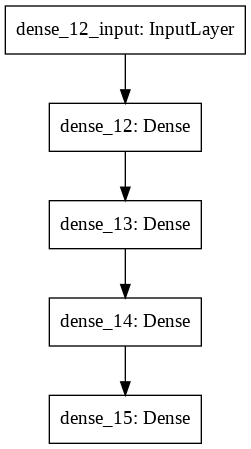

In [57]:
from keras.utils import plot_model
plot_model(model, to_file='Red_Neuronall.png')

In [58]:
model.compile(loss='mean_squared_error',  #Usamos el error cuadratico para tener valores absolutos y facil de medir
              optimizer='adam',  #Adam es un tipo de optimizador que no requiere parámetros de learning rate explícitos sino que los estima
              metrics=['binary_accuracy'])

In [ ]:
train, test = train_test_split(df, test_size=0.3)
train, valid = train_test_split(df, test_size=0.2)
print(len(train))
print(len(test))
print(len(valid))

def extractInputsAndOutputs(dataframe):
  inputs = dataframe.iloc[:,0:9]
  outputs = dataframe.iloc[:,9:11]
  return inputs, outputs

In [ ]:
inputs, outputs = extractInputsAndOutputs(train)
print("Input=",inputs.shape, ", Outputs=", outputs.shape)

history = model.fit(inputs, outputs, epochs=30)

In [51]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['binary_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored